In [8]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0
inches.shape

(365,)

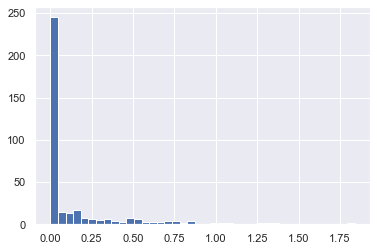

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
plt.hist(inches, 40);

In [10]:
#BOOLEAN ARRAYS AND MASKS:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [11]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [12]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [13]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [14]:
# are there any values less than zero?
np.any(x < 0)

False

In [15]:
# are all values less than 10?
np.all(x < 10)

True

In [16]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

In [17]:
np.sum((inches > 0.5) & (inches < 1))

29

In [18]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


In [19]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


In [23]:
#FANCY INDEXING:
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [24]:
[x[3], x[4], x[7]]

[71, 60, 86]

In [25]:
ind = [3, 6, 7]
x[ind]

array([71, 82, 86])

In [26]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [27]:
X = np.arange(12).reshape((3, 4))
X
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [28]:
#combined fancy indexing:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [29]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [30]:
#combine fancy indexing with masking:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [31]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

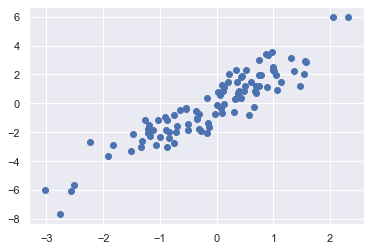

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [33]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([78, 41, 25, 34,  3,  8, 23, 95, 17, 38, 49, 42, 98, 45, 35, 33, 80,
       81, 43, 21])

In [34]:
np.random.choice?

In [35]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

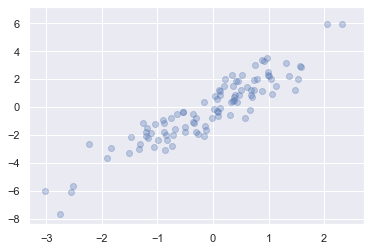

In [36]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

In [37]:
#modify values using fancy indexing
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [38]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [39]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 1. 1. 0. 1. 0. 0. 0. 1. 0.]


In [40]:
np.add.at?

In [41]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


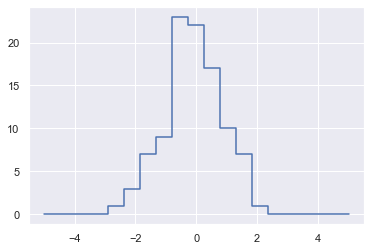

In [42]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

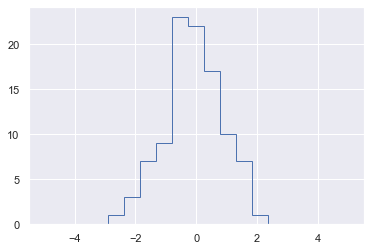

In [43]:
plt.hist(x, bins, histtype='step');